<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment6(Q2)_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

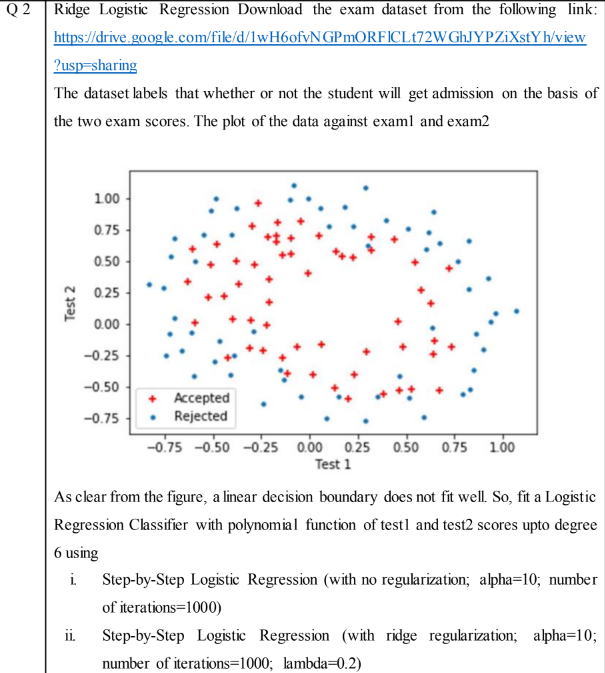

Part i

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/exam6.txt',header=None,names=['Exam1','Exam2','Result'])
df.head()

,Exam1,Exam2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


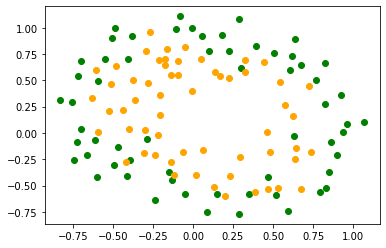

In [3]:
df1 = df[df['Result']==0]
df2 = df[df['Result']==1]
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c='green')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c='orange')
plt.show()

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(6)
X = pf.fit_transform(X)
X.shape

(118, 28)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
def GDO(X_train,Y_train):
  n=1000
  alpha=10 
  m,k=X_train.shape 
  beta=np.zeros(k)
  for i in range(n): 
    cost_gradient=np.zeros(k) 
    z=X_train.dot(beta) 
    predicted=1/(1+np.exp(-z)) 
    difference=predicted-Y_train
    for j in range(k): 
      cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k): 
      beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
  return beta

In [6]:
def GDO_ridge(X_train,Y_train):
  n=1000
  alpha=10 
  lamba = 0.2
  m,k=X_train.shape 
  beta=np.zeros(k)
  for i in range(n): 
    cost_gradient=np.zeros(k) 
    z=X_train.dot(beta) 
    predicted=1/(1+np.exp(-z)) 
    difference=predicted-Y_train
    for j in range(k): 
      cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k): 
      beta[j]=beta[j]*(1-alpha*lamba/m)-(alpha/m)*cost_gradient[j]
  return beta

In [7]:
from sklearn.metrics import accuracy_score
beta = GDO(X_train,y_train)
Y_predict = 1/(1+np.exp(-(X_test.dot(beta))))
Y_label = (Y_predict>=0.5)
accuracy_score(y_test,Y_label)

0.7916666666666666

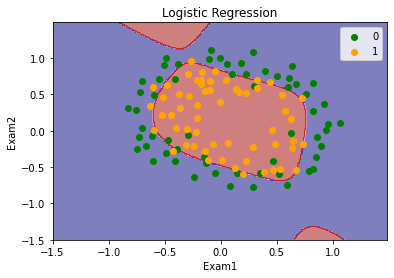

In [8]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = -1.5, stop = 1.5, step = 0.01),
                     np.arange(start = -1.5, stop = 1.5, step = 0.01))
dataset = np.array([X1.ravel(),X2.ravel()]).T
pf = PolynomialFeatures(6)
temp = pf.fit_transform(dataset)
Z = 1/(1+np.exp(-(temp.dot(beta))))
for i in range(len(Z)):
  if Z[i]>=0.5: Z[i] = 1
  else: Z[i] = 0

plt.contourf(X1,X2,Z.reshape(X1.shape),cmap = 'seismic',alpha=0.5)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
df1 = df[df['Result']==0]
df2 = df[df['Result']==1]
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c='green',label='0')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c='orange',label='1')
plt.title('Logistic Regression')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

Part ii

In [9]:
beta = GDO_ridge(X_train,y_train)
Y_predict = 1/(1+np.exp(-(X_test.dot(beta))))
Y_label = (Y_predict>=0.5)
accuracy_score(y_test,Y_label)

0.8333333333333334

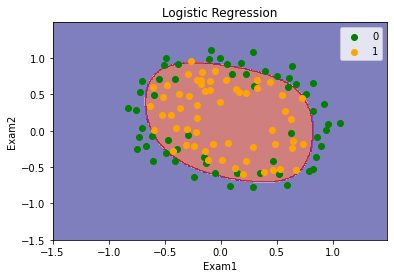

In [10]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = -1.5, stop = 1.5, step = 0.01),
                     np.arange(start = -1.5, stop = 1.5, step = 0.01))
dataset = np.array([X1.ravel(),X2.ravel()]).T
pf = PolynomialFeatures(6)
temp = pf.fit_transform(dataset)
Z = 1/(1+np.exp(-(temp.dot(beta))))
for i in range(len(Z)):
  if Z[i]>=0.5: Z[i] = 1
  else: Z[i] = 0

plt.contourf(X1,X2,Z.reshape(X1.shape),cmap = 'seismic',alpha=0.5)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
df1 = df[df['Result']==0]
df2 = df[df['Result']==1]
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c='green',label='0')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c='orange',label='1')
plt.title('Logistic Regression')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

---